In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
df = pd.read_csv("./data/preprocessing_data.csv")
del df["Unnamed: 0"]

## Shuffle data

In [3]:
np_array = df.to_numpy()
np.random.shuffle(np_array)

In [4]:
np_array

array([[48.   , 53.   , 10.   ,  5.   ,  0.634],
       [51.   , 56.   , 50.   , 15.   ,  0.915],
       [60.   , 60.   , 30.   ,  5.   ,  0.852],
       ...,
       [93.   , 60.   , 50.   ,  0.   ,  0.684],
       [45.   , 50.   , 30.   , 15.   ,  0.833],
       [93.   , 60.   , 10.   , 20.   ,  0.904]])

In [5]:
X = np_array[:,:-1]
y = np_array[:,-1]

## Split data (Train : Test)

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33, random_state=42)

In [7]:
print("train_X shape :",train_X.shape)
print("test_X shape :",test_X.shape)
print("train_y shape :",train_y.shape)
print("test_y shape :",test_y.shape)

train_X shape : (412, 4)
test_X shape : (203, 4)
train_y shape : (412,)
test_y shape : (203,)


In [8]:
mlp_regr = MLPRegressor(hidden_layer_sizes=(200,200),activation='logistic',solver='adam',random_state=42,max_iter=500).fit(train_X, train_y)

In [9]:
lr_pred_mlp = mlp_regr.predict(X=test_X)
print("RMSE: ", np.sqrt(metrics.mean_squared_error(lr_pred_mlp, test_y)))
print("R2:", metrics.r2_score(test_y, lr_pred_mlp))

RMSE:  0.04889541323197481
R2: 0.9538156020676561


In [10]:
mlp_regr.score(test_X,test_y)

0.9538156020676561

In [11]:
lr_pred_mlp[:20]

array([0.65222206, 0.90251735, 0.03449163, 0.85348638, 0.85132114,
       0.84085549, 0.34025611, 0.78231646, 0.50105654, 0.95650198,
       0.84685778, 0.88436977, 0.68496989, 0.76614696, 0.83339375,
       0.83803321, 0.61325971, 0.23218993, 0.77051952, 0.81922594])

In [12]:
test_y[:20]

array([0.721, 0.913, 0.   , 0.859, 0.86 , 0.849, 0.361, 0.852, 0.434,
       0.946, 0.861, 0.89 , 0.737, 0.832, 0.828, 0.913, 0.664, 0.316,
       0.684, 0.916])

### x-axis : Real <------> y-axis : predict

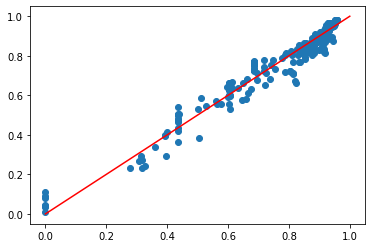

In [13]:
plt.scatter(x=test_y, y=lr_pred_mlp)
plt.plot([0,1],[0,1], color='r')
plt.show()